# Project One
Jerome Fleischman and Isaac Attuah




Our goal for this project is to explore the behavior of the Bayesian
classifier in numeric domains using three domains from the UCI repository. 
The domains that will be explored are:
* Stocks
* Absenteeism at work
* Iris 

## Stocks
In predicting stock prices you collect data over some period of time - day, week, month, etc. But you cannot take advantage of data from a time period until the next increment of the time period. For example, assume you collect data daily. When Monday is over you have all of the data for that day. However you can invest on Monday, because you don't get the data until the end of the day. You can use the data from Monday to invest on Tuesday.

Source: [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index)

#### Import Libraries

In [1]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection

#### Import and Describe Data

In [2]:
dataset = pd.read_csv('dow_jones.csv') # to import the dataset into a variable
dataset.fillna(0, inplace=True) #removes empty values
#dataset.describe(include= 'all')
dataset

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


#### Select Columns

In [3]:
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, 3:14].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, 13:14].values.flatten() # dependent variable / Class
print(X.shape)
print(Y.shape)
#print(Y)

(750, 11)
(750,)


#### Break Data Into Training and Testing Sets

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X,Y.astype('int'), test_size = 0.33, random_state = 17 ) #Undiscretized Form
Y_bin = pd.cut(Y,4,labels = False) #Values above 5 give a higher error rate
X_train, X_test, y_train, y_test = train_test_split(X,Y_bin, test_size = 0.33, random_state = 17 )

#### Gaussian Naive Bayes

In [5]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))



GaussianNB()
Accuracy Score 0.782258064516129
Error Rate 0.217741935483871


#### Kernel Functions (Sum of Gaussians)

In [6]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))

Accuracy Score 0.8185483870967742
Error Rate 0.18145161290322576


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=1))

[[  0   0   1   0]
 [  0   0  25   0]
 [  0   0 203   0]
 [  0   0  19   0]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00        25
           2       0.82      1.00      0.90       203
           3       1.00      0.00      0.00        19

    accuracy                           0.82       248
   macro avg       0.95      0.25      0.23       248
weighted avg       0.85      0.82      0.74       248



### Data Set Plot

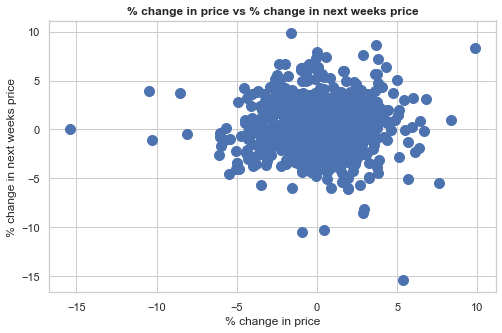

In [31]:
#ax = dataset.plot()
plt.figure(figsize=(8,5))
plt.title('% change in price vs % change in next weeks price', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.xlabel('% change in price')
plt.ylabel('% change in next weeks price')
plt.scatter(dataset.percent_change_price, dataset.percent_change_next_weeks_price, s = 100, alpha = 1)
plt.savefig("figure.png")

### Model Comparison

In [9]:
names = ['Gaussian Naive Bayes','Kernel Functions']
classifiers = [GaussianNB(),SVC(kernel='rbf')]
scores = []
error_rates = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    error_rates.append(1-score)


df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
df['Error Rate'] = error_rates
df


,Classifier Name,Accuracy Score,Error Rate
0,Gaussian Naive Bayes,0.782258,0.217742
1,Kernel Functions,0.818548,0.181452


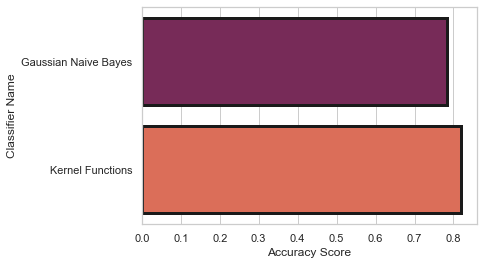

In [10]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data=df, palette = "rocket", edgecolor="0.1", linewidth=3.0)
plt.savefig('save_as_a_png.png',bbox_inches='tight')

## Absenteeism at work

### Import and Describe Data

In [11]:
#Selecting Columns
datasetb = pd.read_csv('Absenteeism_at_work.csv') # to import the dataset into a variable
datasetb.fillna(0, inplace=True)
#dataset.describe(include= 'all')
datasetb

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


### Select Columns

In [12]:
# Splitting the attributes into independent and dependent attributes
X = datasetb.iloc[:, 3:14].values # attributes to determine dependent variable / Class
Y = datasetb.iloc[:, 9:10].values.flatten() # dependent variable / Class
print(X.shape)
print(Y.shape)
#print(Y)

(740, 11)
(740,)


### Break Data Into Training and Testing Sets

In [13]:
#Breaking Data into Training and Testing Sets
#X_train, X_test, y_train, y_test = train_test_split(X,Y.astype('int'), test_size = 0.33, random_state = 17 ) #Undiscretized Form
Y_bin = pd.cut(Y,4,labels = False) #Values above 5 give a higher error rate
X_train, X_test, y_train, y_test = train_test_split(X,Y_bin, test_size = 0.33, random_state = 17 )

### Gaussian Naive Bayes

In [14]:
#GuassianNaiveBayes
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))

GaussianNB()
Accuracy Score 0.9551020408163265
Error Rate 0.04489795918367345


### Kernel Functions (Sum of Gaussians)

In [15]:
#Kernel Functions (Sum of Gaussians)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))

Accuracy Score 0.9102040816326531
Error Rate 0.0897959183673469


### Data Set Plot

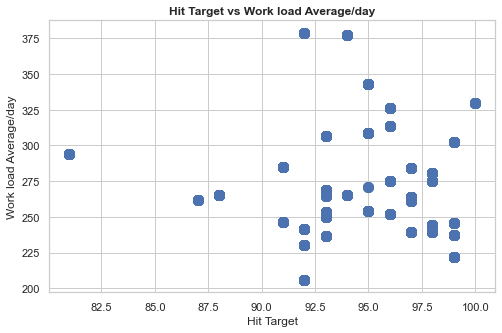

In [16]:
#ax = dataset.plot()
plt.figure(figsize=(8,5))
plt.title('Hit Target vs Work load Average/day', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.xlabel('Hit Target')
plt.ylabel('Work load Average/day')
plt.scatter(datasetb['Hit target'], datasetb['Work load Average/day '],s = 100)
#plt.savefig('ghana.jpg')

In [17]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=1))

[[ 71  13   0   0]
 [  1 100   0   0]
 [  0   5  36   0]
 [  0   0   3  16]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91        84
           1       0.85      0.99      0.91       101
           2       0.92      0.88      0.90        41
           3       1.00      0.84      0.91        19

    accuracy                           0.91       245
   macro avg       0.94      0.89      0.91       245
weighted avg       0.92      0.91      0.91       245



### Model Comparison

In [18]:
names = ['Gaussian Naive Bayes','Kernel Functions']
classifiers = [GaussianNB(),SVC(kernel='rbf')]
scores = []
error_rates = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    error_rates.append(1-score)


df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
df['Error Rates'] = error_rates
df

,Classifier Name,Accuracy Score,Error Rates
0,Gaussian Naive Bayes,0.955102,0.044898
1,Kernel Functions,0.910204,0.089796


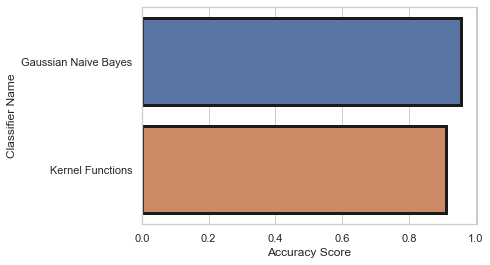

In [19]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data=df,  palette = "deep", edgecolor="0.1", linewidth=3.0)
#plt.savefig('save_as_a_png.png',bbox_inches='tight')

## Iris

### Import and Describe Data

In [20]:
#Selecting Columns
datasetc = pd.read_csv('iris.csv') # to import the dataset into a variable
datasetc.fillna(0, inplace=True)
#dataset.describe(include= 'all')
datasetc

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Select Columns

In [21]:
# Splitting the attributes into independent and dependent attributes
X = datasetc.iloc[:, 0:4].values # attributes to determine dependent variable / Class
Y = datasetc.iloc[:, 3:4].values.flatten() # dependent variable / Class
print(X.shape)
print(Y.shape)
#print(Y)

(150, 4)
(150,)


### Break Data Into Training and Testing Sets

In [22]:
#Breaking Data into Training and Testing Sets
#X_train, X_test, y_train, y_test = train_test_split(X,Y.astype('int'), test_size = 0.33, random_state = 17 ) #Undiscretized Form
Y_bin = pd.cut(Y,4,labels = False) #Values above 5 give a higher error rate
X_train, X_test, y_train, y_test = train_test_split(X,Y_bin, test_size = 0.33, random_state = 17 )

#from sklearn.cross_validation import train_test_split
#X_train, X_test,Y_train,Y_Test= train_test_split(X,Y,test_size=0.5)

### Gaussian Naive Bayes

In [23]:
#GuassianNaiveBayes
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)
y_expect = y_test
y_pred = GausNB.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))

GaussianNB()
Accuracy Score 0.96
Error Rate 0.040000000000000036


### Kernel Functions (Sum of Gaussians)

In [24]:
#Kernel Functions (Sum of Gaussians)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('Accuracy Score ' + str(accuracy_score(y_expect, y_pred)))
print('Error Rate ' + str(1-accuracy_score(y_expect, y_pred)))

Accuracy Score 0.8
Error Rate 0.19999999999999996


### Data Set Plot

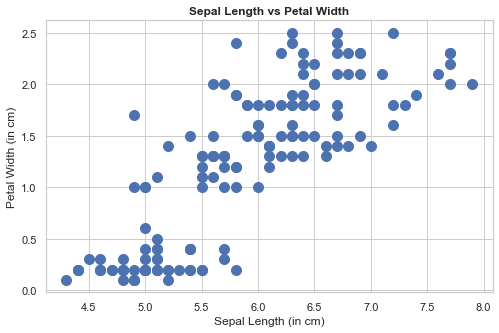

In [25]:
#ax = dataset.plot()
plt.figure(figsize=(8,5))
plt.title('Sepal Length vs Petal Width', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.scatter(datasetc.sepal_length, datasetc.petal_width, s = 100)
#plt.savefig('lol.jpg')

### Model Comparison

In [26]:
names = ['Gaussian Naive Bayes','Kernel Functions']
classifiers = [GaussianNB(),SVC(kernel='rbf')]
scores = []
error_rates = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    error_rates.append(1-score)


df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
df['Error Rates'] = error_rates
df

,Classifier Name,Accuracy Score,Error Rates
0,Gaussian Naive Bayes,0.96,0.04
1,Kernel Functions,0.80,0.20


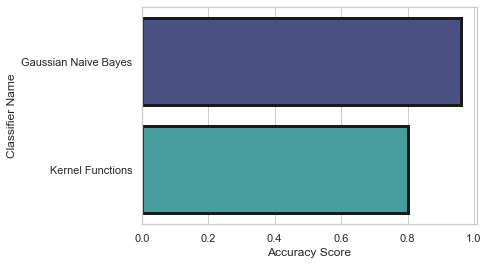

In [27]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data=df,  palette = "mako", edgecolor="0.1", linewidth=3.0)